<a href="https://colab.research.google.com/github/sidneyFdev/-M-tricas-de-Avalia-o-de-Aprendizado-de-Machine-Learning-com-Python/blob/main/Calculando_M%C3%A9tricas_da_matriz_de_confus%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Cálculo de Métricas de Avaliação de Aprendizado
## Importando bibliotecas necessárias
Neste passo, vamos importar as bibliotecas necessárias: numpy para a criação dos arrays, pandas e seaborn para manipulação e visualização da matriz de confusão, e matplotlib.pyplot para exibição dos gráficos.

Como o objetivo deste projeto é somente entender como funcionam os calculos das matrizes, será utilizado uma matriz simples de duas colunas e duas linhas.

In [1]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

## Criando a matriz de confusão

Neste passo, geramos os valores de preditivos positivos e reais positivos utilizando o numpy, com uma amostra de 100 dados aleatórios entre 0 e 1.

Em seguida, montamos um DataFrame com pandas e, com ele, geramos a matriz de confusão, que será exibida como um mapa de calor na tela.

Dados para a matriz de confusão:
Verdedeiro positivo:

[0 0 1 1 0 0 0 1 1 0] ...

Predito positivo: 

[0 0 0 1 1 0 0 1 0 1] ...

Matriz de Confusão:



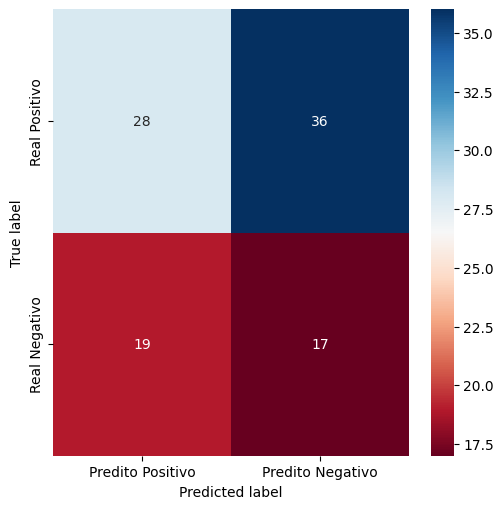

In [2]:
y_real = np.random.randint(0, 2, size=100)

y_pred = np.random.randint(0, 2, size=100)

cm = confusion_matrix(y_real, y_pred)

cm_df = pd.DataFrame(cm, columns=["Predito Positivo", "Predito Negativo"],
                     index=["Real Positivo", "Real Negativo"])
print('Dados para a matriz de confusão:')
print(f'Verdedeiro positivo:\n\n{y_real[:10]} ...\n')
print(f'Predito positivo: \n\n{y_pred[:10]} ...\n')

print("Matriz de Confusão:\n")

figure = plt.figure(figsize=(5, 5))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.RdBu)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Funções de calculo

Nesta etapa, criaremos as cinco funções responsáveis pelo cálculo das principais métricas de avaliação de aprendizado, que são:

- Sensibilidade
- Especificidade
- Acurácia
- Precisão
- F-Score

In [3]:
## Guias de nomes:
# VP - Verdadeiro Positivo
# VN - Verdadeiro Negativo
# FP - Falso Positivo
# FN - Falso Negativo
# P - Precisão
# S - sensibilidade
# N - Total de elementos

def cm_sensibility_calc(VP, FN):
    return VP / (VP + FN)

def cm_specificity_calc(VN, FP):
    return VN / (VN + FP)

def cm_accuracy_calc(VP, VN, FP, FN):
    N = VP + VN + FP + FN
    return (VP + VN) / N

def cm_precision_calc(VP, FP):
    return VP / (VP + FP)

def cm_fscore_calc(P, R):
    return 2 * ((P * R) / (P + R))

## Calculando nossa matriz de confusão

Nesta etapa, extraímos os valores da matriz de confusão (armazenados no DataFrame) e os utilizamos para calcular as métricas de avaliação, conforme os nomes definidos no passo anterior.


In [4]:
cm_sensibility = cm_sensibility_calc(cm_df['Predito Positivo']['Real Positivo'], cm_df['Predito Negativo']['Real Negativo'])
cm_specificity = cm_specificity_calc(cm_df['Predito Negativo']['Real Negativo'], cm_df['Predito Positivo']['Real Negativo'])
cm_accuracy = cm_accuracy_calc(cm_df['Predito Positivo']['Real Positivo'], cm_df['Predito Positivo']['Real Negativo'],
                               cm_df['Predito Negativo']['Real Positivo'], cm_df['Predito Negativo']['Real Negativo'])
cm_precision = cm_precision_calc(cm_df['Predito Positivo']['Real Positivo'], cm_df['Predito Negativo']['Real Negativo'])
cm_fscore = cm_fscore_calc(cm_precision, cm_sensibility)

print(f'Métrica de sensibilidade: {cm_sensibility}')
print(f'Métrica de especificidade: {cm_specificity}')
print(f'Métrica de acurácia: {cm_accuracy}')
print(f'Métrica de precisão: {cm_precision}')
print(f'Métrica de F-Score: {cm_fscore}')


Métrica de sensibilidade: 0.6222222222222222
Métrica de especificidade: 0.4722222222222222
Métrica de acurácia: 0.47
Métrica de precisão: 0.6222222222222222
Métrica de F-Score: 0.6222222222222222
